<a href="https://colab.research.google.com/github/Sushila-Phogat/Data-science-with-Python/blob/master/breast-cancer_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd

colnames=['Class', 'age', 'menopause', 'tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']
df2=pd.read_csv('https://raw.githubusercontent.com/Sushila-Phogat/CE888/master/Assignment1/data/breast-cancer.data', names=colnames, header=None)

df2.head(5)


,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [50]:
df2.describe()

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [51]:
df2['Class'].value_counts()

no-recurrence-events    201
recurrence-events        85
Name: Class, dtype: int64

In [52]:
#Making class in numerica by no-recurrence-events as 0 and recurrence-events as 1
df2.replace({'no-recurrence-events': 0, 'recurrence-events': 1}, inplace=True)
df2.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,0,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,0,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,0,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,0,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [0]:
#Deleting recurrence-events(1) class data to make imbalance data more than 90%
df2=df2.sort_values(by='Class', ascending=False)[70:-1]

In [54]:
#Checking imbalance percentage after deleting data
from statistics import *

clas_mean= df2['Class'].mean()
clas_std = df2['Class'].std()
df2['z-score'] = (df2['Class']-clas_mean)/clas_std
values_plus_minus_one_z_score = len(df2[df2['z-score'].between(-1, 1)==True])
percent_values_plus_minus_one_z_score = values_plus_minus_one_z_score/len(df2)*100
percent_values_plus_minus_one_z_score

93.02325581395348

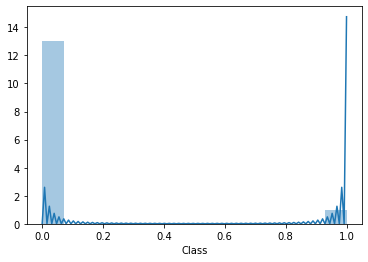

In [55]:
#Plots for classses in data
import seaborn as sns

sns.distplot(df2['Class'])


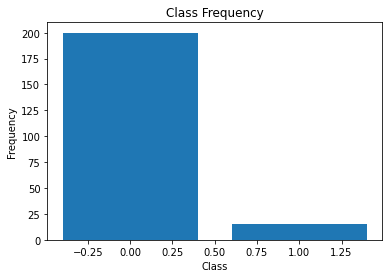

In [56]:
#Histogram plot for classses in data with count of each class
import numpy as np
import matplotlib.pyplot as plt

classes = df2['Class'].values
unique, counts = np.unique(classes, return_counts=True)


plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

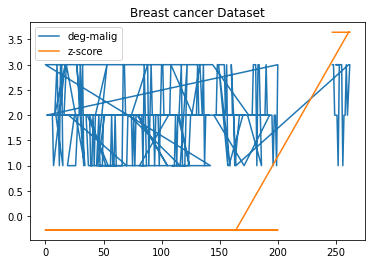

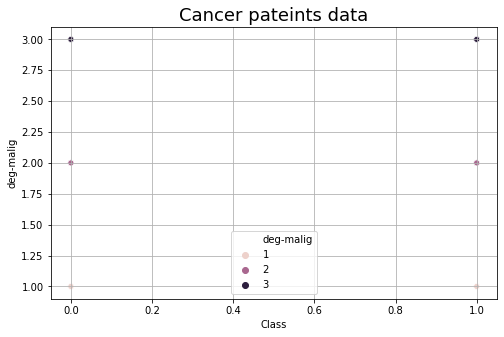

In [57]:
# Plots
df2.drop(['Class'], axis=1).plot.line(title='Breast cancer Dataset')

plt.figure(figsize=(8,5))
plt.title("Cancer pateints data", fontsize=18)
plt.grid(True)

sns.scatterplot(df2['Class'],df2['deg-malig'],hue=df2['deg-malig'],legend='full')

In [58]:
df2.columns

Index(['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat', 'z-score'],
      dtype='object')

In [59]:
from sklearn.preprocessing import LabelEncoder
# convert a string variable to a categorical one
df2[["age"]] = df2[["age"]].apply(LabelEncoder().fit_transform)
df2[["menopause"]] = df2[["menopause"]].apply(LabelEncoder().fit_transform)
df2[["tumor-size"]] = df2[["tumor-size"]].apply(LabelEncoder().fit_transform)
df2[["inv-nodes"]] = df2[["inv-nodes"]].apply(LabelEncoder().fit_transform)
df2[["breast"]] = df2[["breast"]].apply(LabelEncoder().fit_transform)
df2[["breast-quad"]] = df2[["breast-quad"]].apply(LabelEncoder().fit_transform)
df2[["irradiat"]] = df2[["irradiat"]].apply(LabelEncoder().fit_transform)
df2[["node-caps"]] = df2[["node-caps"]].apply(LabelEncoder().fit_transform)
df2.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,z-score
247,1,3,0,5,5,2,3,0,3,1,3.642982
248,1,4,0,6,4,2,3,0,1,0,3.642982
249,1,1,2,3,3,2,2,0,1,0,3.642982
251,1,2,2,10,0,1,2,1,1,1,3.642982
252,1,1,2,7,0,1,1,0,2,0,3.642982


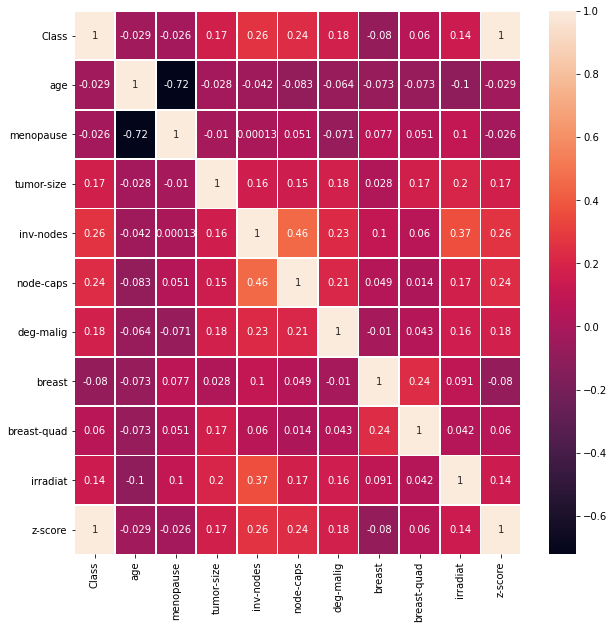

In [60]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

sns.heatmap(df2.corr(), annot=True,linewidths=.7, ax=ax)

In [0]:
X=df2.iloc[:,1:len(df2.columns)-2]
y=df2.iloc[:,len(df2.columns)-2:len(df2.columns)-1]

# Cross-validation on your dataset using a decision tree 

-- 10-fold cross-validation 
All DT scores: 
{'fit_time': array([0.001899  , 0.00181293, 0.00170732, 0.00168228, 0.00160623,
       0.00159526, 0.00160789, 0.00156164, 0.00167584, 0.00183439]), 'score_time': array([0.0008781 , 0.00079775, 0.00076008, 0.00070834, 0.00072026,
       0.00071788, 0.00077057, 0.0007093 , 0.00076461, 0.00068712]), 'test_score': array([0.8 , 0.8 , 0.8 , 1.  , 1.  , 1.  , 0.25, 0.75, 0.75, 0.75])}
Accuracy mean is: 0.79
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        36
           1       0.25      0.14      0.18         7

    accuracy                           0.79        43
   macro avg       0.55      0.53      0.53        43
weighted avg       0.75      0.79      0.77        43



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


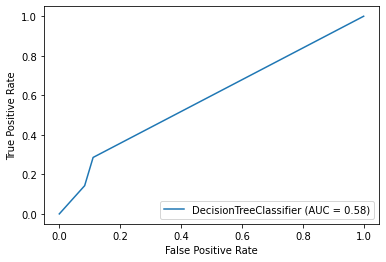

In [62]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report


# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("-- 10-fold cross-validation ")

#Defining Decision Tree
dt_clf = DecisionTreeClassifier(criterion="entropy", random_state=10, max_depth=2, min_samples_leaf=4)

#Training Decision Tree
dt_clf.fit(X_train, y_train)

#Cross Validating using Decision Tree
old_dt_scores =cross_validate(dt_clf,  X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=dt_clf.predict(X_test)
#Result
print("All DT scores: ")
print(old_dt_scores)
print("Accuracy mean is:", old_dt_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))


plot_roc_curve(dt_clf, X_test, y_test.values.ravel())
plt.show() 

#Cross-validation on your dataset using a random forest

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


All RF scores: 
{'fit_time': array([0.12775445, 0.12072372, 0.12380099, 0.12381744, 0.12595439,
       0.12858558, 0.12650061, 0.12119484, 0.12107444, 0.12229371]), 'score_time': array([0.00794435, 0.00853181, 0.00788736, 0.01429033, 0.00786257,
       0.00799513, 0.0079267 , 0.00799227, 0.00796437, 0.00794005]), 'test_score': array([0.8 , 0.8 , 0.8 , 0.75, 1.  , 1.  , 0.75, 0.75, 0.75, 0.75])}
Accuracy mean is: 0.8150000000000001
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        36
           1       0.25      0.14      0.18         7

    accuracy                           0.79        43
   macro avg       0.55      0.53      0.53        43
weighted avg       0.75      0.79      0.77        43



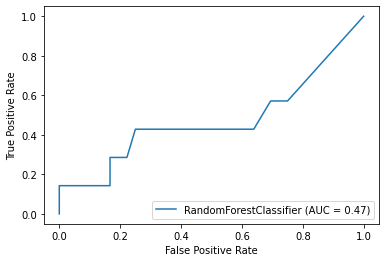

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve


#Defining Random Forest Classifier
rf_clf = RandomForestClassifier()

#Training Random Forest Classifier
rf_clf.fit(X_train, y_train)

#Cross Validating Random Forest
old_rf_scores =cross_validate(rf_clf, X_test, y_test.values.ravel(),
                     cv=10)

y_prdct=rf_clf.predict(X_test)
#Result
print("All RF scores: ")
print(old_rf_scores)

print("Accuracy mean is:", old_rf_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))
plot_roc_curve(rf_clf, X_test, y_test.values.ravel())
plt.show() 


#Partition the datasets into 10 bins keeping the imbalance ratio from the original dataset

In [64]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Separating o and 1 classes data
df_class0=df2[df2['Class']==0]
df_class1=df2[df2['Class']==1]

#Countig length of each class data

ln0=int(len(df_class0)/10)
ln1=int(len(df_class1)/10)

init0=0
init1=0

bins=[]

target_count=df2.Class.value_counts()

#original Imbalance
orig_imbalance=(target_count[0]/(target_count[1]+target_count[0]))*100
print("Original Imbalance in the dataset: {} %".format(orig_imbalance))

#Creating 10 bins keeping imbalance percentage as original
for i in range(10):
    curr_bin=pd.concat([df_class0.iloc[init0:init0+ln0,:],df_class1.iloc[init1:init1+ln1,:]])
    target_cnt=curr_bin.Class.value_counts()
    imbalance=(target_cnt[0]/(target_cnt[0]+target_cnt[1]))*100
    print("Class imbalance ratio in bin {} : {} %".format(i,imbalance))
    bins.append(curr_bin.values)
    init0+=ln0
    init1+=ln1


# Preprocessing 9 Bins data as X_train and curr_bin as X_test
bin9=np.vstack((bins[j] for j in range(10) if j!=i )) #combining 9 bins data
data=pd.DataFrame(bin9)
data.columns=df2.columns

X_train=data.iloc[:,1:len(data)-2]
y_train=data.iloc[:,len(data)-2:len(data)-1]
X_test=curr_bin.iloc[:,1:len(data)-2]
y_test=curr_bin.iloc[:,len(data)-2:len(data)-1]

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

Original Imbalance in the dataset: 93.02325581395348 %
Class imbalance ratio in bin 0 : 95.23809523809523 %
Class imbalance ratio in bin 1 : 95.23809523809523 %
Class imbalance ratio in bin 2 : 95.23809523809523 %
Class imbalance ratio in bin 3 : 95.23809523809523 %
Class imbalance ratio in bin 4 : 95.23809523809523 %
Class imbalance ratio in bin 5 : 95.23809523809523 %
Class imbalance ratio in bin 6 : 95.23809523809523 %
Class imbalance ratio in bin 7 : 95.23809523809523 %
Class imbalance ratio in bin 8 : 95.23809523809523 %
Class imbalance ratio in bin 9 : 95.23809523809523 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


#Using the Elbow method and the Silhouette method, identify the number of clusters in the dataset.

silhouette 2th score:0.428095 
Distortion or average SSE for 2th cluster is:1.425314 
silhouette 3th score:0.484087 
Distortion or average SSE for 3th cluster is:0.965796 
silhouette 4th score:0.491596 
Distortion or average SSE for 4th cluster is:0.837952 
silhouette 5th score:0.443954 
Distortion or average SSE for 5th cluster is:0.744494 
silhouette 6th score:0.419857 
Distortion or average SSE for 6th cluster is:0.657776 
silhouette 7th score:0.407251 
Distortion or average SSE for 7th cluster is:0.610531 
silhouette 8th score:0.415910 
Distortion or average SSE for 8th cluster is:0.585035 
silhouette 9th score:0.407585 
Distortion or average SSE for 9th cluster is:0.552062 
silhouette 10th score:0.394112 
Distortion or average SSE for 10th cluster is:0.529976 
silhouette 11th score:0.350518 
Distortion or average SSE for 11th cluster is:0.502295 
silhouette 12th score:0.366381 
Distortion or average SSE for 12th cluster is:0.469372 
silhouette 13th score:0.355743 
Distortion or av

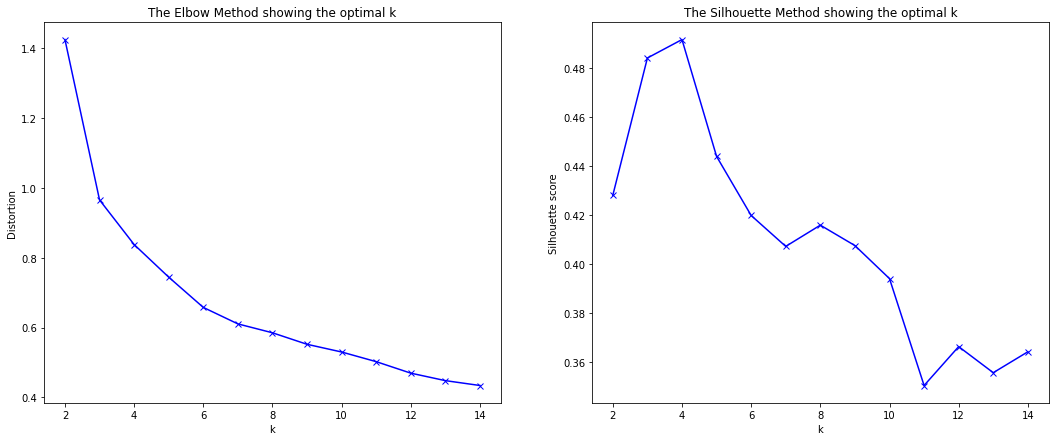

In [65]:
 # clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
silhouette_scores=[]
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train_pca)
    kmeanModel.fit(X_train_pca)
    labels = kmeanModel.labels_
    silhouette_score=metrics.silhouette_score(X_train_pca, labels, metric='euclidean')
    silhouette_scores.append(silhouette_score)
    print("silhouette %dth score:%f "%(k, silhouette_score))
    avg_sse=(sum(np.min(cdist(X_train_pca, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train_pca.shape[0])
    distortions.append(avg_sse)
    print("Distortion or average SSE for %dth cluster is:%f "%(k, avg_sse))


# Plot the elbow
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
ax1.plot(K, distortions, 'bx-')
ax1.set_xlabel('k')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method showing the optimal k')
ax2.plot(K, silhouette_scores, 'bx-')
ax2.set_xlabel('k')
ax2.set_ylabel('Silhouette score')
ax2.set_title('The Silhouette Method showing the optimal k')
plt.show()


#Further Analysis on K with Silhouette Method

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.42809532208069695
For n_clusters = 3 The average silhouette_score is : 0.4840865002100221
For n_clusters = 4 The average silhouette_score is : 0.49159616161234915
For n_clusters = 5 The average silhouette_score is : 0.44283048065927694
For n_clusters = 6 The average silhouette_score is : 0.41985725346070485
For n_clusters = 7 The average silhouette_score is : 0.42475222043572775
For n_clusters = 8 The average silhouette_score is : 0.40906415422087655
For n_clusters = 9 The average silhouette_score is : 0.3974482775751705
For n_clusters = 10 The average silhouette_score is : 0.37591783743625856


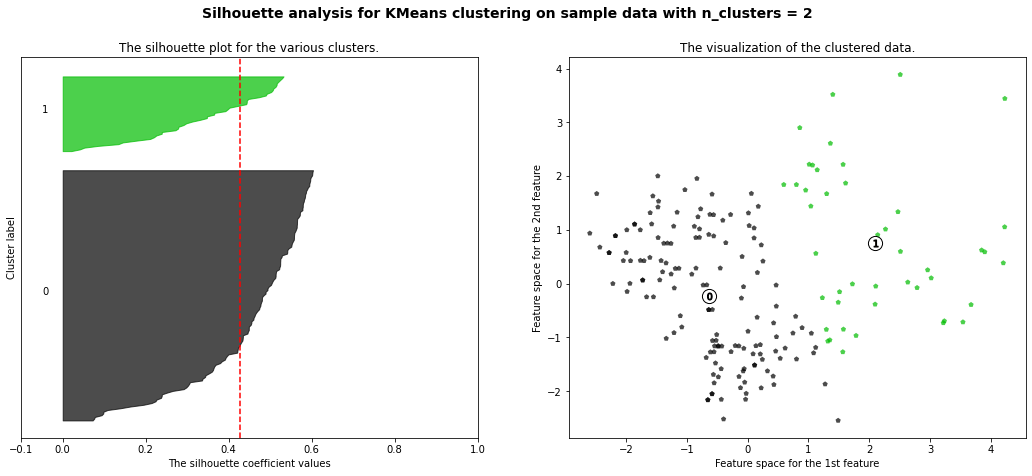

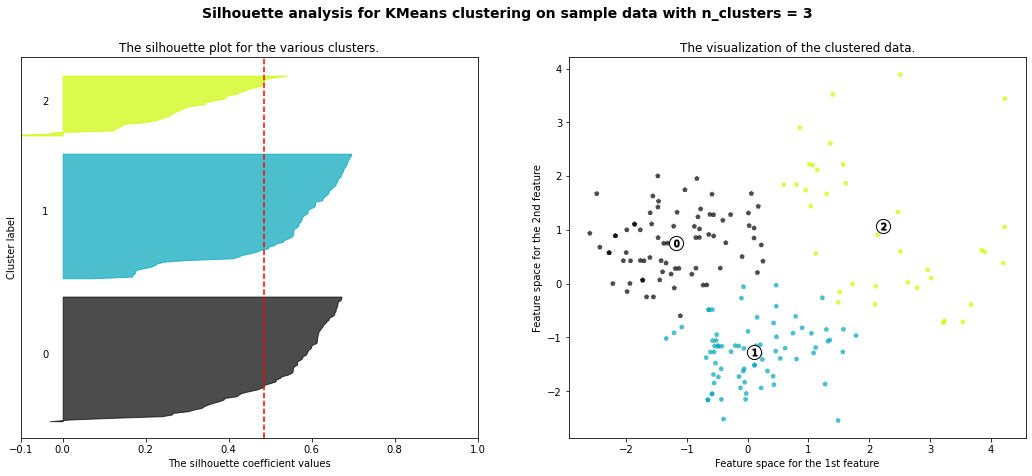

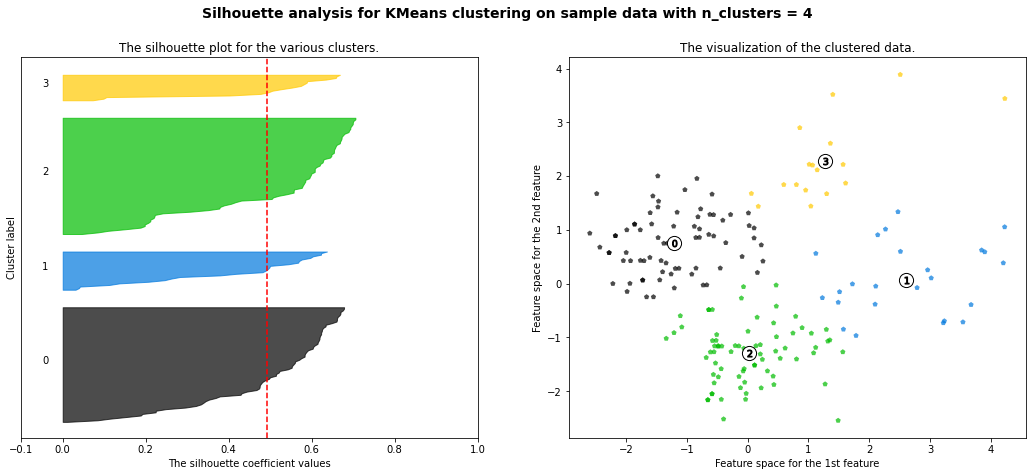

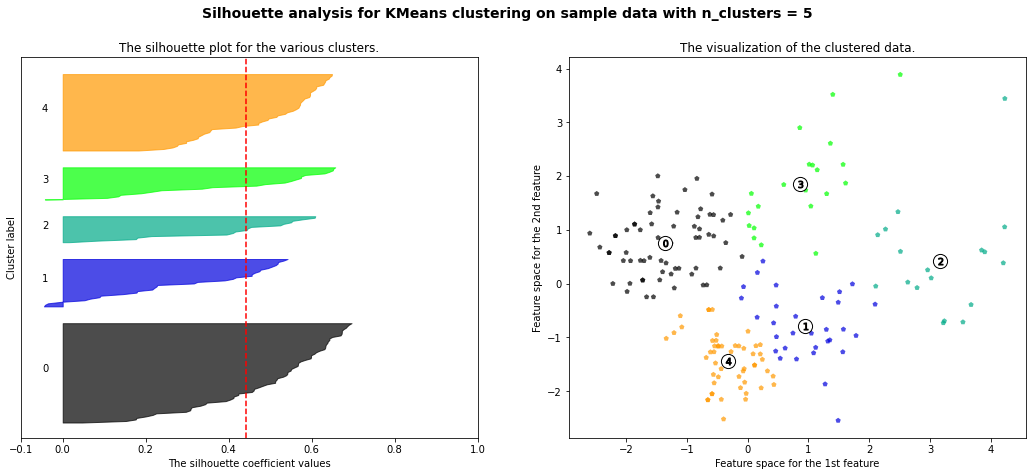

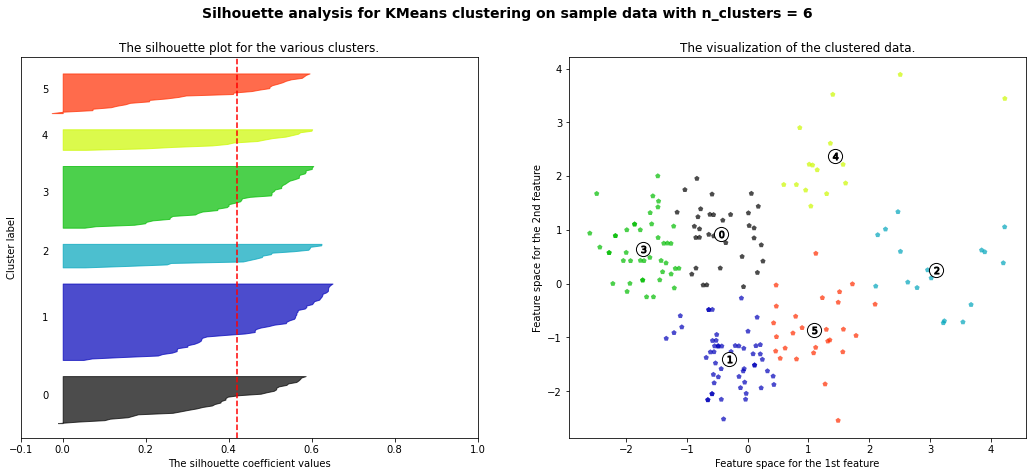

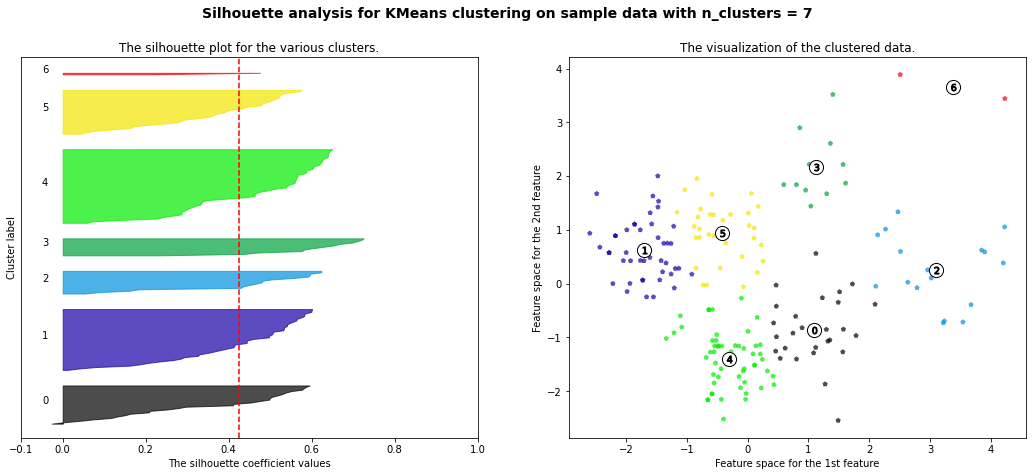

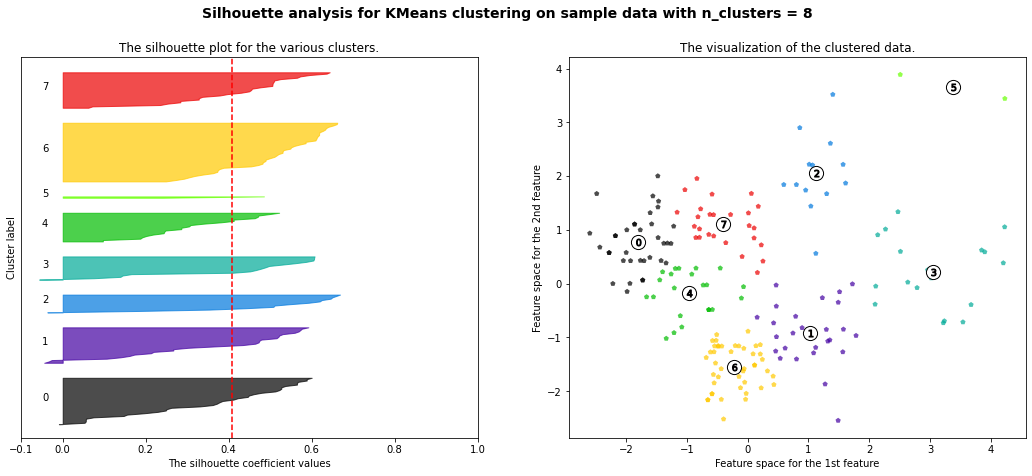

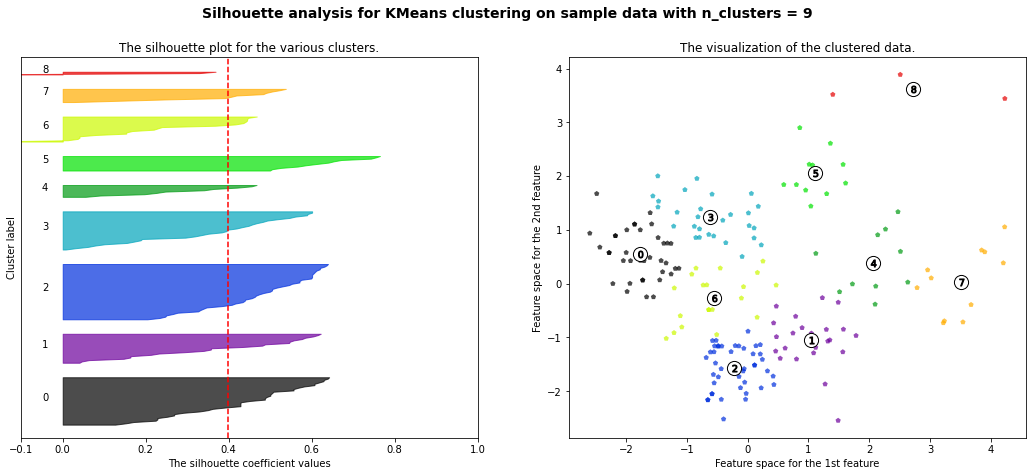

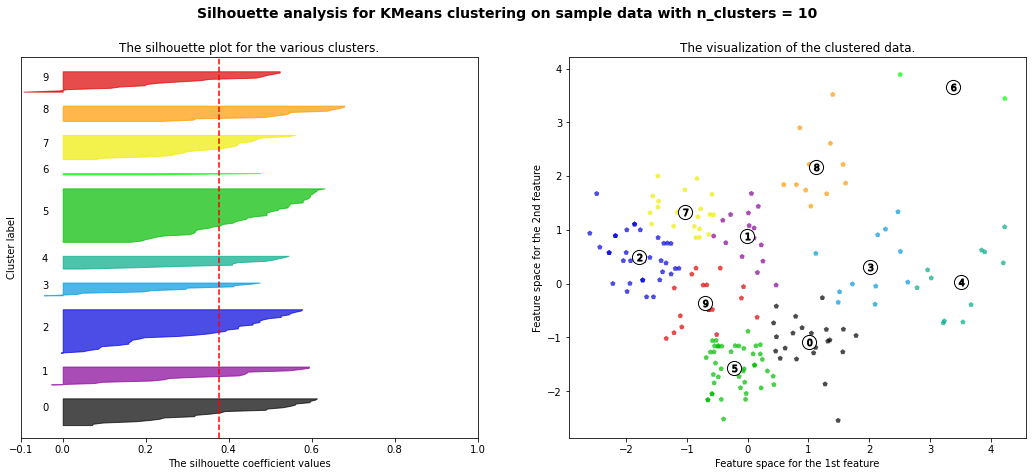

In [66]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_train_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_train_pca[:, 0], X_train_pca[:, 1], marker='p', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#Run k-means in the data set using the identified number of clusters.

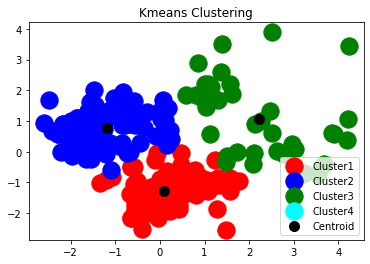

In [67]:


# Implementing the KMeans Algorithm with the optimal no.of Clusters
kmeans = KMeans(n_clusters =3, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
y_kmeans = kmeans.fit_predict(X_train_pca)
cluster_data=data

cols=list(cluster_data.columns)



# Plotting the results
plt.scatter(X_train_pca[y_kmeans == 0, 0], X_train_pca[y_kmeans == 0, 1], s = 300, c = 'red', label = 'Cluster1')
plt.scatter(X_train_pca[y_kmeans == 1, 0], X_train_pca[y_kmeans == 1, 1], s = 300, c = 'blue', label = 'Cluster2')
plt.scatter(X_train_pca[y_kmeans == 2, 0], X_train_pca[y_kmeans == 2, 1], s = 300, c = 'green', label = 'Cluster3')
plt.scatter(X_train_pca[y_kmeans == 3, 0], X_train_pca[y_kmeans == 3, 1], s = 300, c = 'cyan', label = 'Cluster4')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'Black', label = 'Centroid')
plt.title('Kmeans Clustering')
plt.legend(loc="lower right")
plt.show()

#For each cluster identify its centroid and the number of samples of the minority class in that cluster

In [69]:
cluster_data["Cluster label"]=kmeans.labels_

#cluster_data["Centroid"]=kmeans.cluster_centers_
cluster_info = pd.DataFrame()

cluster_info=pd.DataFrame(columns=["Centroid","Cluster label","Min_cls1_cnt_clusterwise","Maj_cls0_cnt_clusterwise"])

for i in cluster_data["Cluster label"].unique():
    count1=np.sum(cluster_data[(cluster_data['Class']==1) & (cluster_data["Cluster label"]==i)].count().unique())
    count0=np.sum(cluster_data[(cluster_data['Class']==0) & (cluster_data["Cluster label"]==i)].count().unique())
    center=kmeans.cluster_centers_[i]
    cluster_info = cluster_info.append(pd.Series(data={'Centroid':center,'Cluster label':i, 'Min_cls1_cnt_clusterwise':count1, 'Maj_cls0_cnt_clusterwise':count0}), ignore_index=True)


cluster_info

,Centroid,Cluster label,Min_cls1_cnt_clusterwise,Maj_cls0_cnt_clusterwise
0,"[-1.1773982282373197, 0.7593338080926043]",1,0,76
1,"[0.09734938682807931, -1.2781599974586488]",0,1,75
2,"[2.2184787012730354, 1.06569703761674]",2,8,29


#Train a random forest for each of the clusters that contains samples from more than one class

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


mean of score for Random Forest Tree is:0.913


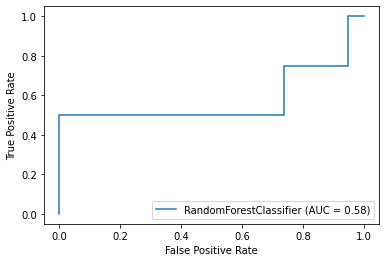

In [188]:
from sklearn.metrics import accuracy_score as acc

Two_cls_info=cluster_info[(cluster_info['Min_cls1_cnt_clusterwise']>0) & (cluster_info['Maj_cls0_cnt_clusterwise']>0)]
Two_cls_labels=Two_cls_info['Cluster label']
Two_cls_data=pd.DataFrame()
Two_cls_data.dropna
for i in Two_cls_labels:
  df=cluster_data[cluster_data['Cluster label']==i]
  Two_cls_data=Two_cls_data.append(df)

rf_clf =RandomForestClassifier(n_estimators=100, min_samples_split=20,
                                random_state=8)

rf_score=[]

X_train, X_test, y_train, y_test = train_test_split(Two_cls_data.iloc[:,1:len(Two_cls_data.columns)-3], Two_cls_data.iloc[:,len(Two_cls_data.columns)-3:len(Two_cls_data.columns)-2], test_size=0.2)

rf_clf.fit(X_train,y_train)
yrf_pred=rf_clf.predict(X_test)
y_true=y_test
rf_score.append(acc(y_true,yrf_pred))
print("mean of score for Random Forest Tree is:{:.3f}".format(mean(rf_score)) )

plot_roc_curve(rf_clf, X_test, y_test)
plt.show()


#Assign x from the unseen fold to its closest cluster and If this cluster has only instances of one class, assign to x that label

In [0]:

#If cluster has only one instance of class then label will be that class itself
cluster_info['new_label']=np.where(cluster_info['Maj_cls0_cnt_clusterwise']>cluster_info['Min_cls1_cnt_clusterwise'],0,1)

#Copying cluster_info to cluster_info_new and adding 'New_label' column with modified labels

cluster_info_new=cluster_info
n_clusters=4
#X_test_labels contain assignment of labels on base of elucdian distance from centroids
X_test_labels=np.zeros(X_test_pca.shape[0])
for i in range(len(X_test_pca)):
  min_dis=10000
  for j in range(n_clusters-2):
    if np.linalg.norm(X_test_pca[i]-kmeans.cluster_centers_[j])<min_dis:
      min_dis=np.linalg.norm(X_test_pca[i]-kmeans.cluster_centers_[j])
      X_test_labels[i]=cluster_info_new['new_label'][j]

curr_bin["Cluster lable"]=X_test_labels
curr_bin["Cluster lable"] = curr_bin["Cluster lable"].astype(int)



#Second method to find out cluster label of left out fold

In [72]:
def cluster_2_label(alpha):
    if alpha == 0:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 1:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 2:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 3:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 4:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 5:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 6:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])
    if alpha == 7:
        return int(cluster_info[cluster_info['Cluster label']==alpha]['new_label'])

predict=kmeans.fit_predict(X_test_pca)
labels_2 = predict
curr_bin['cluster_label']=labels_2
curr_bin['class_label']=curr_bin['cluster_label'].apply(cluster_2_label)

print(predict)
#curr_bin = curr_bin.iloc[:,[0,1,2,3,4,5,6,7,8,9]]
print(pd.crosstab(curr_bin['Class'],curr_bin['class_label']))
print("Accuracy of defining class label: " ,acc(curr_bin['class_label'],curr_bin['Class']))
#curr_bin

[0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 2]
class_label   0
Class          
0            20
1             1
Accuracy of defining class label:  0.9523809523809523


#DT and RF model with 10 bin

Scores for stratified Decision Tree are:
[0.42857142857142855, 0.42857142857142855, 0.5238095238095238, 0.5238095238095238, 0.42857142857142855, 0.47619047619047616, 0.5238095238095238, 0.5238095238095238, 0.5714285714285714, 0.42857142857142855]
Scores for stratified Random Forest Tree are:
[0.5238095238095238, 0.5238095238095238, 0.47619047619047616, 0.47619047619047616, 0.42857142857142855, 0.42857142857142855, 0.47619047619047616, 0.47619047619047616, 0.42857142857142855, 0.42857142857142855]
Average Accuracy for Decision Tree: 0.49 +/- 0.05
AverageAccuracy for RF Tree: 0.47 +/- 0.04
classification_report for Decision Tree is:
              precision    recall  f1-score   support

           0       0.47      0.73      0.57        11
           1       0.25      0.10      0.14        10

    accuracy                           0.43        21
   macro avg       0.36      0.41      0.36        21
weighted avg       0.37      0.43      0.37        21

classification_report for Random F

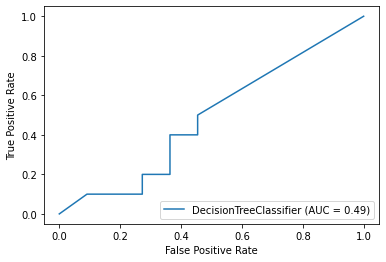

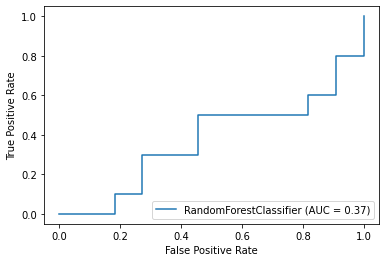

In [189]:
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score as acc
from sklearn.decomposition import PCA



rf_clf =RandomForestClassifier(n_estimators=1000,max_depth=8,criterion='entropy', min_samples_split=20,
                                random_state=10)
dt_clf=DecisionTreeClassifier(min_samples_split=20,max_depth=8,
                                random_state=10)
new_rf_score=[]
new_dt_score=[]

init0=0
init1=0

for i in range(10):
    curr_bin=pd.concat([df_class0.iloc[init0:init0+ln0,:],df_class1.iloc[init1:init1+ln1,:]])
    curr_bin=pd.DataFrame(curr_bin)


#Scaling and PCA for current bin
    X_test_bin=curr_bin.iloc[:,1:len(curr_bin.columns)-2]
    X_test_bin=sc.fit_transform(X_test_bin)
    X_test_bin_pca= pca.fit_transform(X_test_bin)
    X_train_bin=X.iloc[i:-1]
    X_train=sc.fit_transform(X_train_bin)
    X_train_pca= pca.fit_transform(X_train_bin)
    X_test_bin=sc.fit_transform(X_test_bin)
    y_train=y.iloc[i:-1]
    y_test_bin=curr_bin.iloc[:,len(curr_bin.columns)-2:len(curr_bin.columns)-1]

#Fitting both model for current bin    
    dt_clf.fit(X_train_pca,y_train.values.ravel())
    rf_clf.fit(X_train_pca,y_train.values.ravel())

#predicting for testing
    yrf_pred=rf_clf.predict(X_test_bin_pca)
    ydt_pred=dt_clf.predict(X_test_bin_pca)
    y_true=y_test_bin
    new_dt_score.append(acc(y_true,ydt_pred))
    new_rf_score.append(acc(y_true,yrf_pred)) 

print("Scores for stratified Decision Tree are:")
print(new_dt_score)
print("Scores for stratified Random Forest Tree are:")
print(new_rf_score)

print("Average Accuracy for Decision Tree: %0.2f +/- %0.2f" % (mean(new_dt_score), np.std(new_dt_score)))
print("AverageAccuracy for RF Tree: %0.2f +/- %0.2f" % (mean(new_rf_score), np.std(new_rf_score)))


#Result
print("classification_report for Decision Tree is:")

print(classification_report(y_true, ydt_pred))

print("classification_report for Random Forest Tree is:")

print(classification_report(y_true, yrf_pred))

plot_roc_curve(dt_clf, X_test_bin_pca, y_test_bin.values.ravel())
plt.show()

plot_roc_curve(rf_clf,X_test_bin_pca, y_test_bin.values.ravel())
plt.show()

    

#Permutation on results and Accuracies metrics

In [78]:
#Decision Tree results:
print("Baseline Decision Tree method accuries:")
print(old_dt_scores['test_score'])

print("\n Baseline Decision Tree method accuries mean:")
print(mean(old_dt_scores['test_score']))

print("\n New method Decision Tree accuries:")
print(new_dt_score) 

print("\n New method Decision Tree accuries mean:")
print(mean(new_dt_score)) 

tobs=mean(new_dt_score)-mean(old_dt_scores['test_score'])

dt_concat = np.concatenate((old_dt_scores['test_score'],new_dt_score))

count=0
for i in range(5000):
  perm = np.random.permutation(dt_concat)
  pcurr = perm[:len(old_dt_scores['test_score'])]
  pnew = perm[:len(new_dt_score)]
  percfltmean=np.mean(pcurr)
  pernfltmean=np.mean(pnew)
  tperm=pernfltmean-percfltmean
  if tperm>tobs:
    count=count+1
p=count/5000
print("Decision Tree p-value :",p)



#Random Forest Tree results:
print("Baseline Random Forest Tree method accuries:")
print(old_rf_scores['test_score'])

print("\n Baseline Random Forest Tree method accuries mean:")
print(mean(old_rf_scores['test_score']))

print("\n New method Random Forest Tree accuries:")
print(new_rf_score)


print("\n New method Random Forest Tree accuries mean:")
print(mean(new_rf_score)) 

tobs=mean(new_rf_score)-mean(old_rf_scores['test_score'])

rf_concat = np.concatenate((old_rf_scores['test_score'],new_rf_score))

count=0
for i in range(2000):
  perm = np.random.permutation(rf_concat)
  pcurr = perm[:len(old_rf_scores['test_score'])]
  pnew = perm[:len(new_rf_score)]
  percfltmean=np.mean(pcurr)
  pernfltmean=np.mean(pnew)
  tperm=pernfltmean-percfltmean
  if tperm>tobs:
    count=count+1
p=count/2000
print("Random Forest Tree p-value :",p)


Baseline Decision Tree method accuries:
[0.8  0.8  0.8  1.   1.   1.   0.25 0.75 0.75 0.75]

 Baseline Decision Tree method accuries mean:
0.79

 New method Decision Tree accuries:
[0.42857142857142855, 0.42857142857142855, 0.5238095238095238, 0.5238095238095238, 0.42857142857142855, 0.47619047619047616, 0.5238095238095238, 0.5238095238095238, 0.5714285714285714, 0.42857142857142855]

 New method Decision Tree accuries mean:
0.4857142857142857
Decision Tree p-value : 1.0
Baseline Random Forest Tree method accuries:
[0.8  0.8  0.8  0.75 1.   1.   0.75 0.75 0.75 0.75]

 Baseline Random Forest Tree method accuries mean:
0.8150000000000001

 New method Random Forest Tree accuries:
[0.5238095238095238, 0.5238095238095238, 0.47619047619047616, 0.47619047619047616, 0.42857142857142855, 0.42857142857142855, 0.47619047619047616, 0.47619047619047616, 0.42857142857142855, 0.42857142857142855]

 New method Random Forest Tree accuries mean:
0.4666666666666667
Random Forest Tree p-value : 1.0


#BoxPlot Comparison

[Text(0, 0.5, 'Accuracy'),
 Text(0.5, 0, 'new_dt_score'),
 Text(0.5, 1.0, 'new_dt_score')]

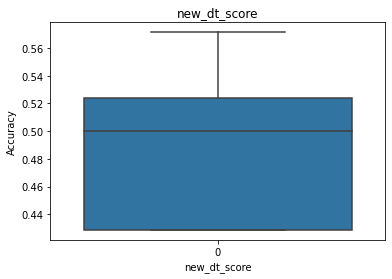

In [75]:
# make grouped boxplot

sns.boxplot(data= new_dt_score).set(title = 'new_dt_score', xlabel = 'new_dt_score', ylabel = 'Accuracy' )

[Text(0, 0.5, 'Accuracy'),
 Text(0.5, 0, 'new_rf_score'),
 Text(0.5, 1.0, 'new_rf_score')]

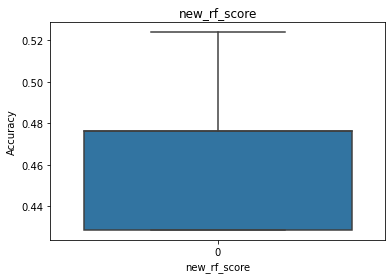

In [76]:

sns.boxplot(data= new_rf_score,dodge=True,fliersize=10).set(title = 'new_rf_score', xlabel = 'new_rf_score', ylabel = 'Accuracy' )

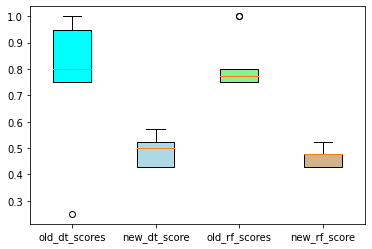

In [77]:
import matplotlib.pyplot as plt


box_plot_data=[old_dt_scores['test_score'],new_dt_score,old_rf_scores['test_score'],new_rf_score]
box=plt.boxplot(box_plot_data,vert=1,patch_artist=True,labels=['old_dt_scores','new_dt_score','old_rf_scores','new_rf_score'],
            )
 
colors = ['cyan', 'lightblue', 'lightgreen', 'tan']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show()